<a href="https://colab.research.google.com/github/AlejandroCarvajal49/PPPLOT---QQPLOT/blob/main/Codigo_QQ_y_PP_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de librerías y datos

In [ ]:
#Toma 20 segundos la primera vez que se ejecuta esta celda
library(readxl)
library(ggplot2)
if (!require("triangle")){install.packages("triangle");library(triangle)}else{library(triangle)}
if (!require("fitdistrplus")){install.packages("fitdistrplus");library(fitdistrplus)}else{library(fitdistrplus)}
options(repr.plot.width=15, repr.plot.height=8)
# Se importan los datos del archivo de Excel utilizando el paquete readxl.
# No olvide subir el archivo de excel antes.
Ej_datos <- read_excel("Clase.xlsx", sheet="Datos_waze")
print(Ej_datos)

Loading required package: triangle

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘triangle’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’


Loading required package: fitdistrplus

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘fitdistrplus’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS

Loading required package: survival



# A tibble: 32 × 2
       i   x_i
   <dbl> <dbl>
 1     1  25.6
 2     2  28  
 3     3  29.1
 4     4  28.2
 5     5  25.2
 6     6  26.1
 7     7  26.4
 8     8  27.1
 9     9  25.7
10    10  26  
# ℹ 22 more rows


##Visualización de datos

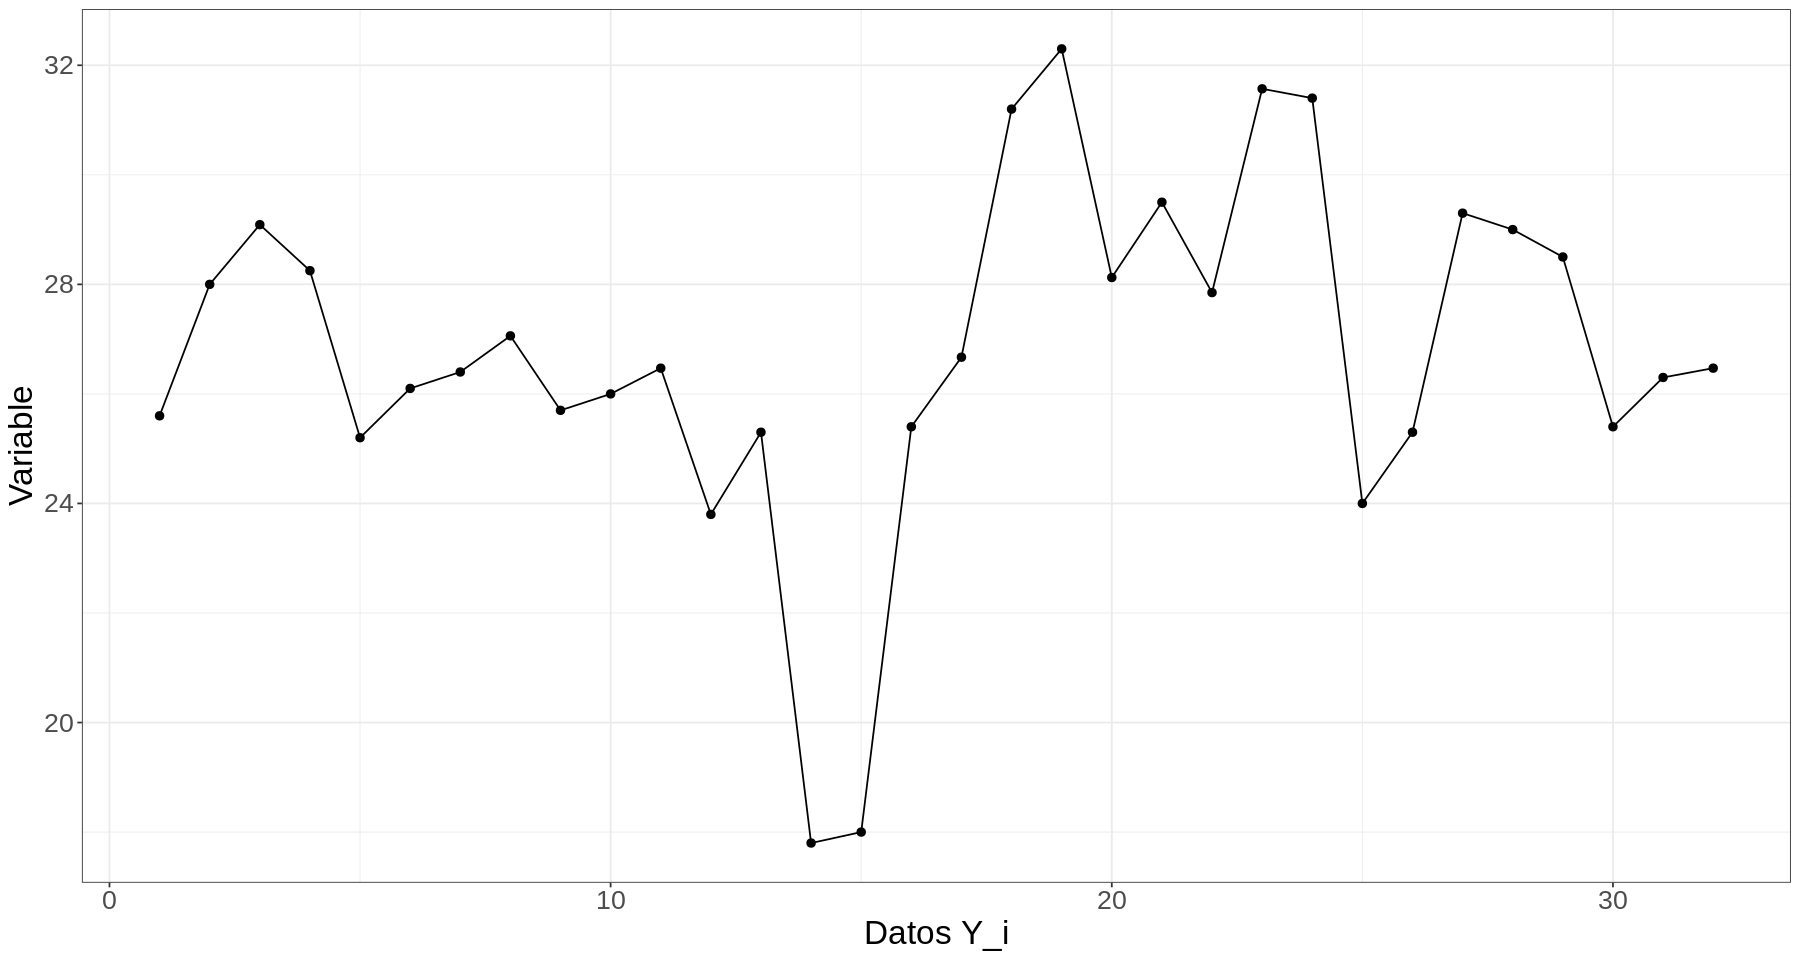

In [ ]:
#Número de datos
n <- dim(Ej_datos)[1]
Y_i <- Ej_datos$x_i

#Visualización gráfica de datos
data_graph <- data.frame(ID=seq(1,n,1),x_i=Y_i)
plot <- ggplot(data_graph, aes(ID, x_i)) + geom_point(size=2) + geom_line() +
  xlab("Datos Y_i") + ylab("Variable") + theme_bw() + theme(text = element_text(size = 20))
print(plot)

## Gráficas QQ plot y PP plot


### Usando parámetros predefinidos por el usuario

Con la función *plotdist* del paquete de R *fitdistrplus* se pueden realizar varias gráficas de comparación entre los datos empíricos y la distribución teórica, entre ellas, las QQ plot y PP plot. Su uso es simple, basta con indicar la muestra de datos empíricos, la abreviación de la distribución de probabilidad teórica, y los parámetros que se quieren evaluar de la distribución. En las siguientes líneas están los ejemplos para las distribuciones más comunes:

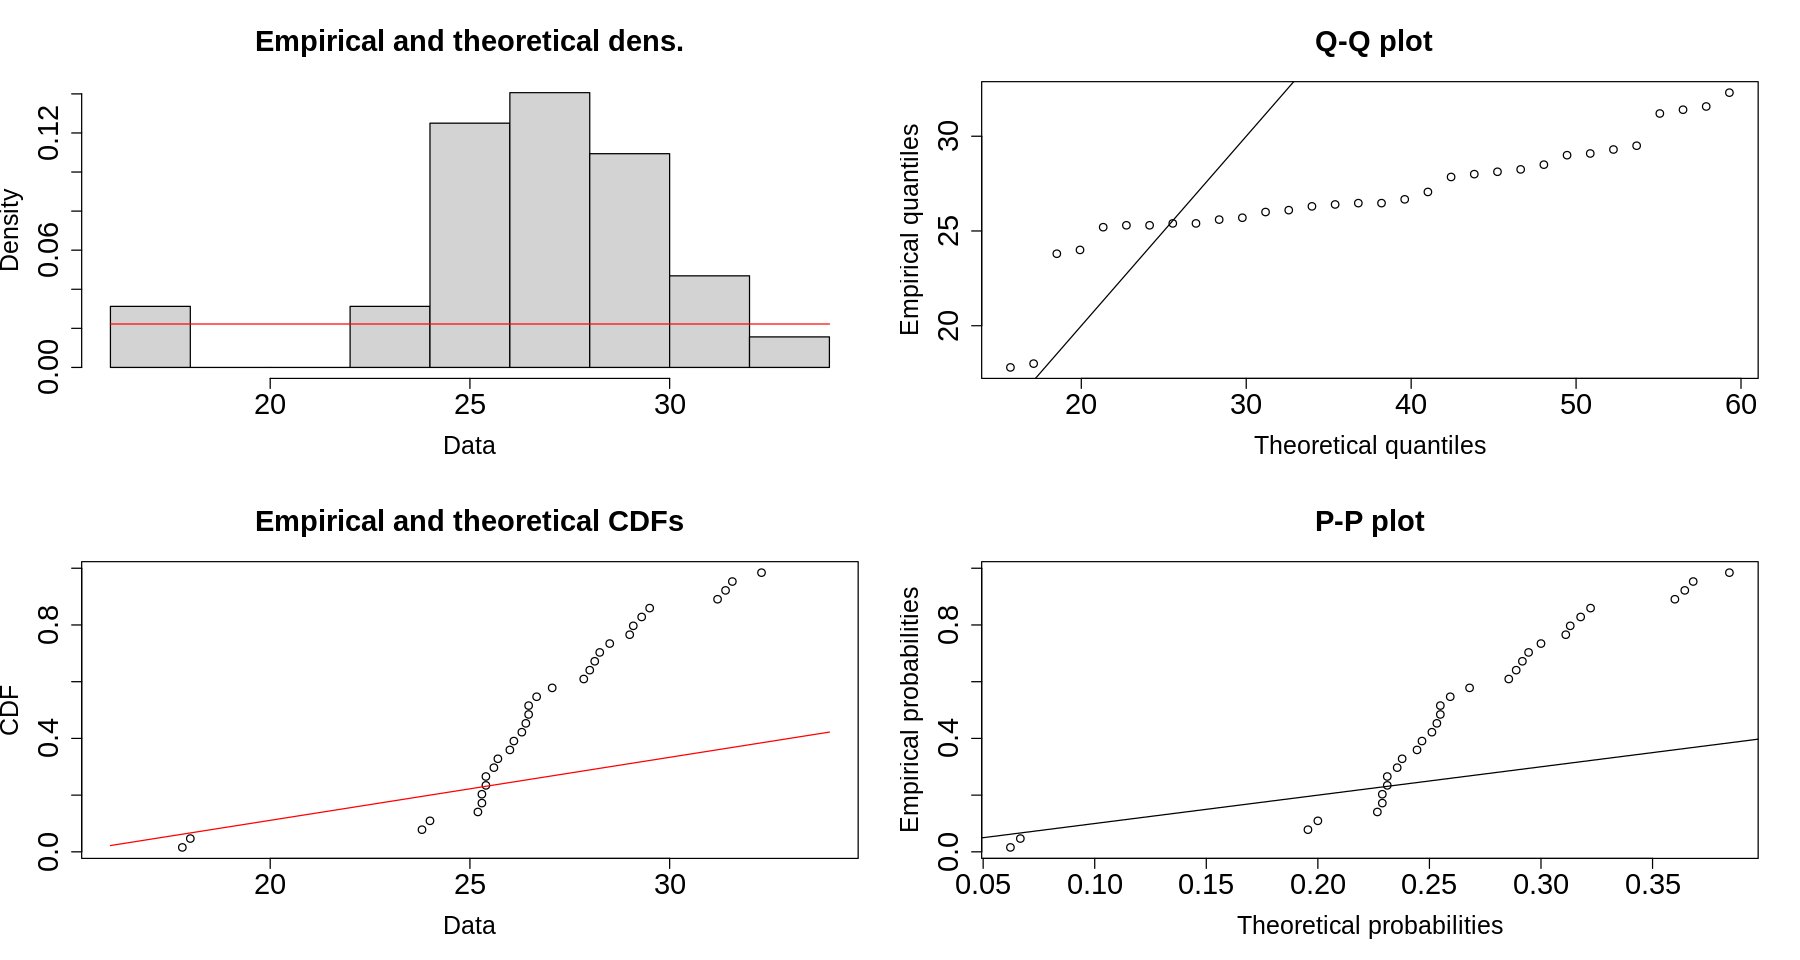

In [ ]:
#UNIFORME
#Use la abreviación "unif" y defina mínimo en "min" y el máximo en "max"
plotdist(Y_i, "unif", para=list(min=15,max=60), cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)

#TRIANGULAR
#Use la abreviación "triangle" y defina el mínimo en "a", el máximo en "b" y la moda en "c"
#plotdist(Y_i, "triangle", para=list(a=5,b=60,c=45), cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)

#EXPONENCIAL
#Exponencial, use la abreviación "exp" y defina la tasa en "rate"
#plotdist(Y_i, "exp", para=list(rate=1), cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)

#NORMAL
#Use la abreviación "norm" y defina la media en "mean" y desviación estándar "sd"
#plotdist(Y_i, "norm", para=list(mean=0,sd=1), cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)

#LOGNORMAL
#Use la abreviación "lnorm" y defina los parámetros de la normal asociada, media en "meanlog" y desviación estándar "sdlog"
#plotdist(Y_i, "lnorm", para=list(meanlog=0,sdlog=1), cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)

#GAMMA
#Use la abreviación "gamma" y defina el parámetro de forma en "shape" y la tasa en "rate"
#plotdist(Y_i, "gamma", para=list(shape=1, rate=1), cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)

#WEIBULL
#Use la abreviación "weibull" y defina el parámetro de forma en "shape" y el parámetro de escala en "scale"
#plotdist(Y_i, "weibull", para=list(shape=1, scale=1), cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)

### Usando parámetros estimados por máxima verosimilitud

El paquete de R *fitdistrplus* posee una función que estima por sí mismo los parámetros de la distribución de interés utilizando el método de máxima verosimilitud. Simplemente debe cambiar el nombre abreviado de la distribución y se reportan los parámetros estimados y las gráficas comparativas (*Nota:* no funciona con la distribución triangular):

min  max 
17.8 32.3

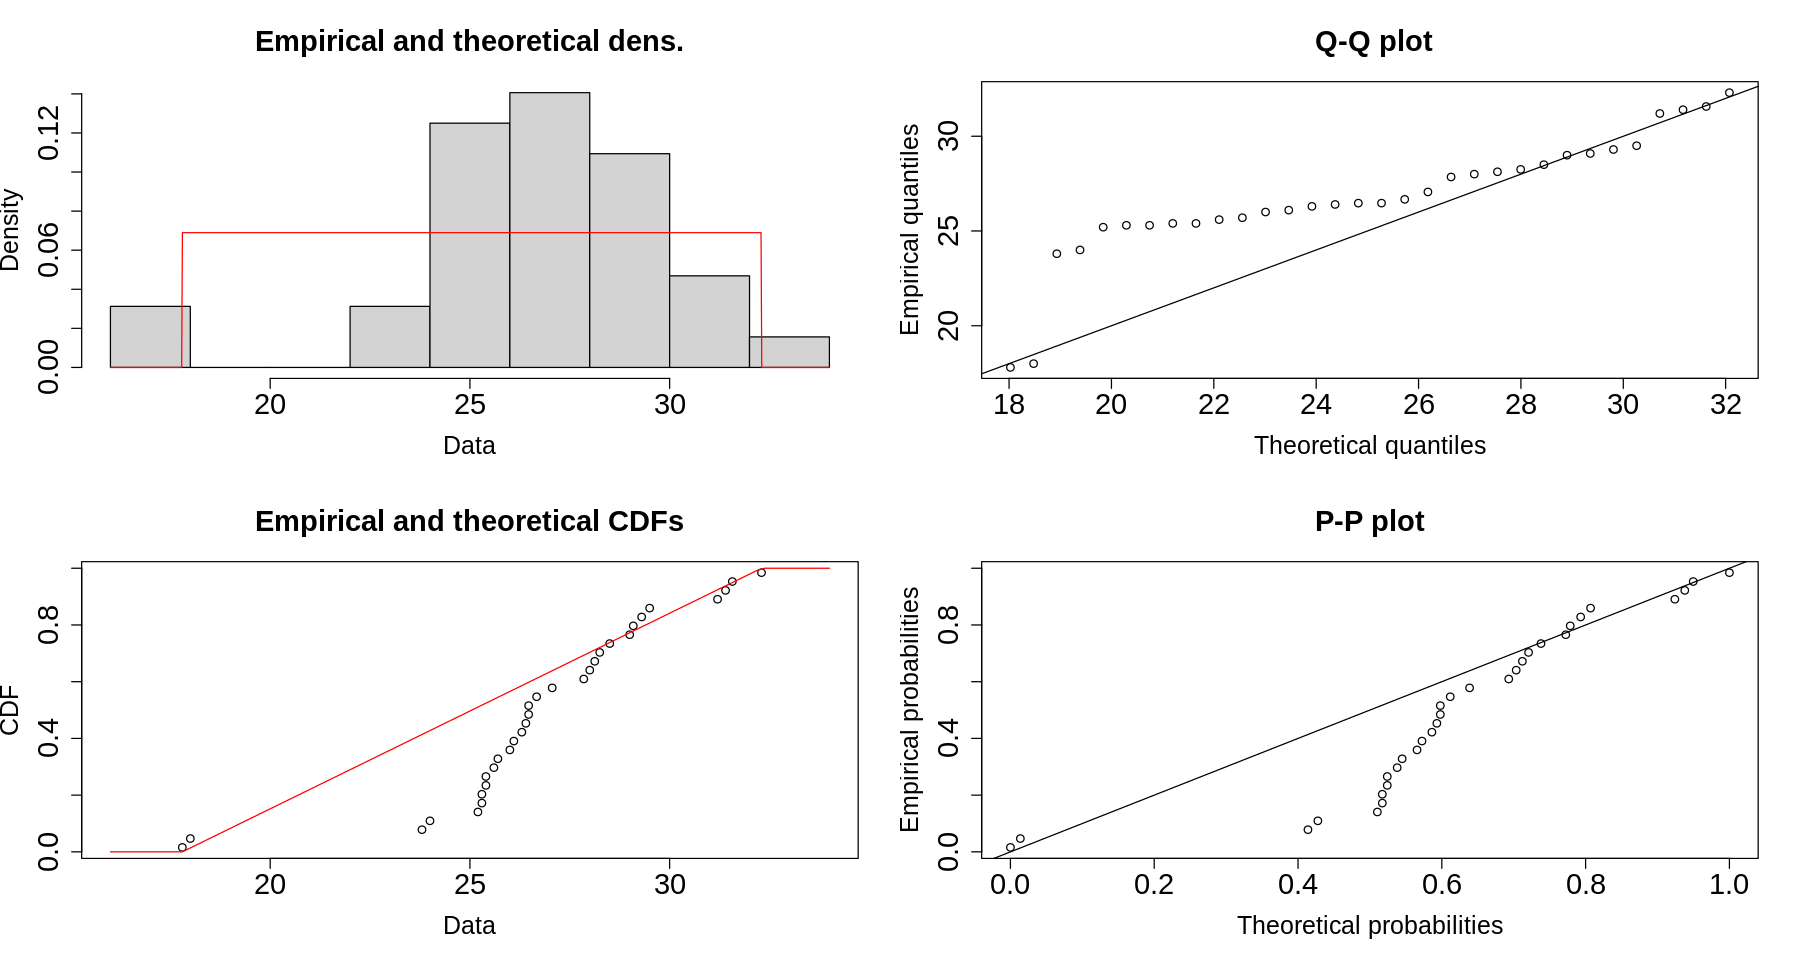

In [ ]:
## Almacenar la estimación por máxima verosimilitud de la serie de datos
## a una distribución de probabilidad ingresada por parámetro.
ajuste <- fitdist(Y_i, "unif")

## Mostrar los parámetros del ajuste a la distribución dada.
ajuste$estimate

## Mostrar las gráficas de interés de las distribuciones empírica y teórica.
plot(ajuste, cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)

En el caso de la distribución triangular, debemos usar las siguientes líneas para calcular los parámetros por máxima verosimilitud.

a        b        c 
16.68510 33.34001 28.25000

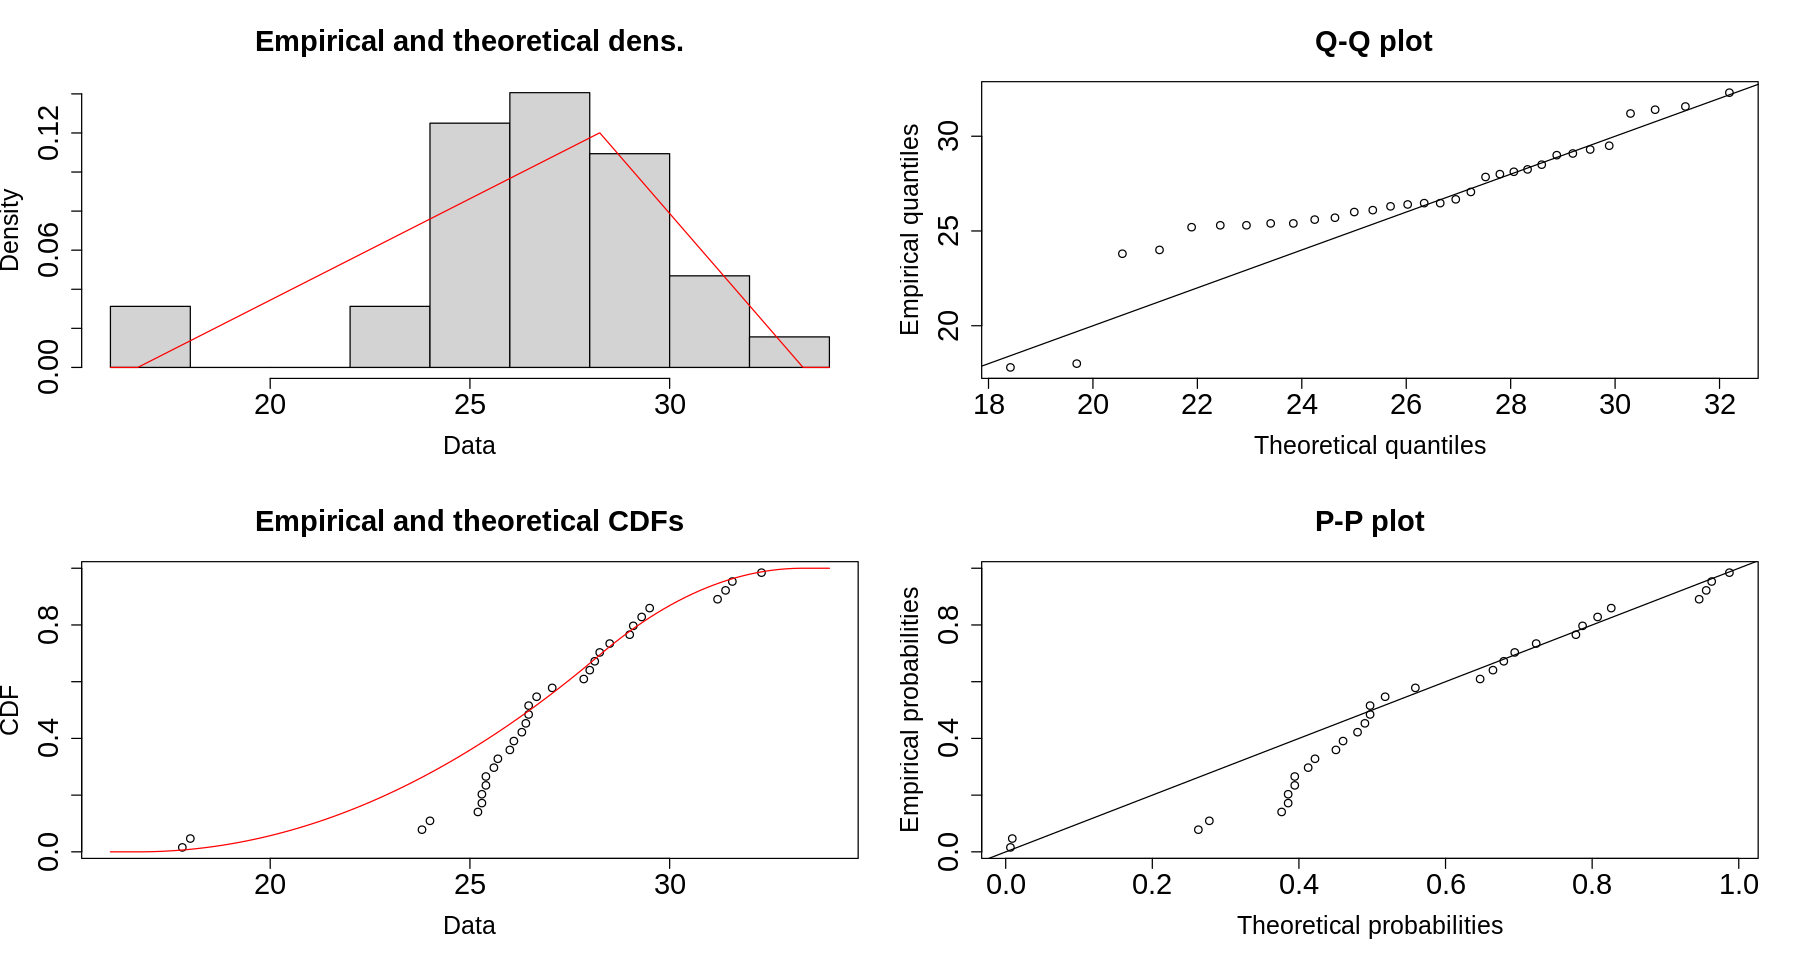

In [ ]:
## Almacenar la estimación por máxima verosimilitud de la serie de datos
## a una distribución de probabilidad triangular.
params <- triangle_mle(Y_i)

## Mostrar los parámetros del ajuste a la distribución dada.
params$coef

## Mostrar las gráficas de interés de las distribuciones empírica y teórica.
plotdist(Y_i, "triangle", para=list(a=params$coef[1],b=params$coef[2],c=params$coef[3]), cex.lab=1.5, cex.axis=1.75, cex.main=1.75, cex.sub=1.75)